# CS 109A Data Science: Project
**Harvard University**<br>
**Fall 2016**<br>
**Team member:** Becerra, Fernando; Mayo, Andrew Wayne; Ding, Yi; Cao, Xinrui<br>
**Project topic:** Predicting Seizures and Epilepsy

In [44]:
import numpy as np
import pandas as pd
import scipy as sp
import time
from scipy.stats import mode
from sklearn import linear_model
import sklearn.linear_model as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
import sklearn.discriminant_analysis as da
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

# Cleaning

In [45]:
# Read in data set UKDA-2024-tab
UKDA16 = pd.read_table('./datasets/NCDS/ncds0123.tab')

In [46]:
#sweep 1
# reason for special education
a = (UKDA16['n390'] =='10') | (UKDA16['n391'] =='10') | (UKDA16['n392'] =='10')
# Epileptic condition
b = (UKDA16['n415'] =='3') | (UKDA16['n415'] =='4')| (UKDA16['n415'] =='5') | (UKDA16['n415'] =='6')
# Fit or convulsion in 1st year of life
c = (UKDA16['n274'] == '2')
# Fit or convulsion after 1st year
d = (UKDA16['n275'] == '2')
# Epilepsy identification
e = (UKDA16['n1842']=='5')
s1 =a|b|c|d|e

In [47]:
# sweep 2
# Has child had epilepsy attacks
a = (UKDA16['n1307']=='1')|(UKDA16['n1307']=='2')|(UKDA16['n1307']=='3')|(UKDA16['n1307']=='4')|(UKDA16['n1307']=='5')
# Age at most recent epilepsy attack
UKDA16['n1314']
# Age at 1st epilepsy attack
UKDA16['n1317']
# Reason for special education
b = (UKDA16['n1477'] =='7') | (UKDA16['n1478'] =='7') | (UKDA16['n1479'] =='7')
# Reason for absence from school
c = (UKDA16['n1321']=='8') |(UKDA16['n1322']=='8')|(UKDA16['n1323']=='8')|(UKDA16['n1324']=='8')|(UKDA16['n1325']=='8') 
# Reason for prescription
d = (UKDA16['n1337']=='1') |(UKDA16['n1338']=='1')
# Ever seen specialist-convulsions,fits
e = (UKDA16['n1394']=='2')|(UKDA16['n1394']=='3')|(UKDA16['n1394']=='5')
# Has child ever had convulsions
f = (UKDA16['n1502'] =='2')| (UKDA16['n1502'] =='3')|(UKDA16['n1502'] =='4')
s2 = a|b|c|d|e
s1s2 =s1|s2

In [48]:
# sweep 3
# Type hcap for which will require help
a = (UKDA16['n2416'] =='7')
# Nature of child-s disability-
b = (UKDA16['n2663'] =='7')|(UKDA16['n2664'] =='7')|(UKDA16['n2665'] =='7')|(UKDA16['n2666'] =='7')|(UKDA16['n2667'] =='7')
# Category of child's handicap
c = (UKDA16['n1893'] =='8')|(UKDA16['n1894'] =='8')|(UKDA16['n1895'] =='8')
# Reason for hosp admiss last 12 mnths
d = (UKDA16['n1904'] =='17')
# Reason hosp outpatient last yr
e = (UKDA16['n1910'] =='17')
# Epilepsy
#f = (UKDA16['n2032'] =='17')
# Reason for absence from school
g = (UKDA16['n2554'] =='11')|(UKDA16['n2556'] =='11')|(UKDA16['n2557'] =='11')|(UKDA16['n2558'] =='11')|(UKDA16['n2559'] =='11')
# Hospital admissions
h = (UKDA16['n2598'] =='7') | (UKDA16['n2599'] =='7') | (UKDA16['n2600'] =='7') | (UKDA16['n2601'] =='7') 
# Hosp outpatient,diagnosed cond
j = (UKDA16['n2603'] =='10')|(UKDA16['n2604'] =='10')|(UKDA16['n2605'] =='10')|(UKDA16['n2606'] =='10')|(UKDA16['n2607'] =='10')|(UKDA16['n2608'] =='10')
# Convulsions,fits-unconsciousness
k = (UKDA16['n2614'] =='1')
# When convulsions,fits 1st occured
(UKDA16['n2615'] =='5')|(UKDA16['n2615'] =='5')
# Convulsions-most recent occurrence
l = (UKDA16['n2616'] =='1')|(UKDA16['n2616'] =='2')|(UKDA16['n2616'] =='3')|(UKDA16['n2616'] =='4')
s3 = d|e|g|h|j|l

- From Sweep 1 and Sweep 2, we extract all children who had any sign of epilepsy and convulsion. 
- From Sweep 3, we extract all children who had any sign of epilepsy and convulsion after age 11 (eg. hospitalization for convulsion or epilepsy, recent occurence of convulsion within 7 years)
- We take the join of s1s2 and s3, which include all children who have sign of epilepsy before 11 and had recurrence after 11.

In [49]:
sum(s1s2)

1026

In [50]:
sum(s1s2 & s3)

250

- select social economic status and medical status variables from three sweep and combine

In [51]:
filename = "./datasets/NCDS/sweep1_new.txt"
s1_variable = []
for line in open(filename):
    if 'Pos.' in line:
        name = line.rstrip().replace("\t",' ').split(' ')[5]
        s1_variable.append(name)
        
print len(s1_variable)

126


In [52]:
filename = "./datasets/NCDS/sweep2_new.txt"
s2_variable = []
for line in open(filename):
    if 'Pos.' in line:
        name = line.rstrip().replace("\t",' ').split(' ')[5]
        s2_variable.append(name)
        
print len(s2_variable)

44


In [53]:
filename = "./datasets/NCDS/sweep3_new.txt"
s3_variable = []
for line in open(filename):
    if 'Pos.' in line:
        name = line.rstrip().replace("\t",' ').split(' ')[5]
        s3_variable.append(name)
        
print len(s3_variable)

37


In [54]:
variables = s1_variable + s2_variable + s3_variable

### Here comes our final dataset!

In [55]:
data = UKDA16[variables][s1s2]

- Count missing rate

In [56]:
a = (data=='-1').sum(axis =0)/1046
b = (data==' ').sum(axis =0)/1046
sum(a+b<0.5)

188

In [57]:
#drop data with >0.5 missing rate
data = data[list(data.columns[np.where(a+b<0.5)])]

# fill in the blanks as '-1'
for col in data.columns:
    value = data[col]
    missing_index = (value == ' ')
    data[col][missing_index] = '-1'

In [58]:
data = data.convert_objects(convert_numeric=True)
data.shape

/Users/Jessica/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



(1026, 188)

In [59]:
# fill in the missing data
# randomly choose a value from the same colunm
for col in data.columns:
    value = data[col]
    if(len(np.unique(value))>20):
        missing_index = (value == -1)
        filled_index = (value != -1)
        data[col][missing_index] = np.mean(value[filled_index])

/Users/Jessica/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [60]:
data_dummy=pd.DataFrame()

for i in data.columns:
    if len(np.unique(data[i]))<=20:
        data_dummy=pd.concat([data_dummy, pd.get_dummies(data[i])], axis=1)
    else:
        data_dummy=pd.concat([data_dummy, data[i]], axis=1)

data_dummy.shape

(1026, 1284)

In [61]:
# create response
y = np.zeros(len(UKDA16))
y = pd.DataFrame(y, index = UKDA16.index)
y[s1s2&s3] = 1
y = y[s1s2]
y = y.astype(int)

In [62]:
y = y[0] # This is required so that y has the right shape

# Model

Predictors are in `data`, response is in `y`


In [63]:
def calculate_model(x_train, y_train, x_test, y_test, x, model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x)
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    return score_train, score_test, y_pred

def print_info(title, train, test, cm):
    print '*** ' + title + ' ***'
    print 'Training score: %.3f, Testing score: %.3f' %(train.mean(), test.mean())
    print 'Non-relapse accuracy: %.3f, relapse accuracy: %.3f' %(float(cm[0, 0]) / cm[0].sum(), float(cm[1, 1]) / cm[1].sum())

In [64]:
def find_feature(position, index, features):
    n = len(features)
    for i in range(n-1):
        if position in range(index[i],index[i+1]):
            break
    return features[i]
    

In [65]:
index = [0]
i = 0
for col in data.columns:
    x = np.unique(data[col])
    if len(x)<=20:
        i = i+len(x)
    else:
        i = i+1
    index = index + [i]
    
features = list(data.columns)

find_feature(3, index, features)

'n0region'

## A broad view of all methods

In [66]:
n_iter = 10
n_rows = data_dummy.shape[0]
depths = range(1,3)
n_depths = len(depths)
#Cs = [0.1, 1, 10, 100]
#n_Cs = len(Cs)
C = 10

logreg_test = np.zeros(n_iter)
logreg_train = np.zeros(n_iter)
logreg_pred = np.zeros(n_rows)
dt_test = np.zeros((n_iter, n_depths))
dt_train = np.zeros((n_iter, n_depths))
dt_pred = np.zeros((n_rows, n_depths))
lda_test = np.zeros(n_iter)
lda_train = np.zeros(n_iter)
lda_pred = np.zeros(n_rows)
qda_test = np.zeros(n_iter)
qda_train = np.zeros(n_iter)
qda_pred = np.zeros(n_rows)
rf_test = np.zeros((n_iter, n_depths))
rf_train = np.zeros((n_iter, n_depths))
rf_pred = np.zeros((n_rows, n_depths))
svc_linear_test = np.zeros(n_iter)
svc_linear_train = np.zeros(n_iter)
svc_linear_pred = np.zeros(n_rows)
svc_quad_test = np.zeros(n_iter)
svc_quad_train = np.zeros(n_iter)
svc_quad_pred = np.zeros(n_rows)


for i in range(n_iter):

    print 'Iteration %i' %i

    x_train, x_test, y_train, y_test = train_test_split(data_dummy, y, train_size=0.6)

    logreg = LogisticRegression(C=1000)
    logreg_train[i], logreg_test[i], y_pred = calculate_model(x_train, y_train, x_test, y_test, data_dummy, logreg)
    logreg_pred += y_pred

    lda = LDA()
    lda_train[i], lda_test[i], y_pred = calculate_model(x_train, y_train, x_test, y_test, data_dummy, lda)
    lda_pred += y_pred

    qda = QDA()
    qda_train[i], qda_test[i], y_pred = calculate_model(x_train, y_train, x_test, y_test, data_dummy, qda)
    qda_pred += y_pred

    for depth in depths:

        dt = DecisionTree()
        dt_train[i, depth-1], dt_test[i, depth-1], y_pred = calculate_model(x_train, y_train, x_test, y_test, data_dummy, dt)
        dt_pred[:, depth-1] += y_pred

        rf = RandomForest()
        rf_train[i, depth-1], rf_test[i, depth-1], y_pred = calculate_model(x_train, y_train, x_test, y_test, data_dummy, rf)
        rf_pred[:, depth-1] += y_pred


    svc_linear = SVC(C=C, kernel='linear') #, class_weight=weights)
    svc_linear_train[i], svc_linear_test[i], y_pred = calculate_model(x_train, y_train, x_test, y_test, data_dummy, svc_linear)
    svc_linear_pred += y_pred 

    svc_quad = SVC(C=C, kernel='rbf') #, class_weight=weights)
    svc_quad_train[i], svc_quad_test[i], y_pred = calculate_model(x_train, y_train, x_test, y_test, data_dummy, svc_quad)
    svc_quad_pred += y_pred 

# Choose depth with maximum test score
dt_idx = np.argmax(dt_test.mean(axis=0))
rf_idx = np.argmax(rf_test.mean(axis=0))

# Choose C with maximum test score
svc_linear_idx = np.argmax(svc_linear_test.mean(axis=0))
svc_quad_idx = np.argmax(svc_quad_test.mean(axis=0))

# Take majority vote
logreg_pred = [1 if pred > n_iter/2. else 0 for pred in logreg_pred]
lda_pred = [1 if pred > n_iter/2. else 0 for pred in lda_pred]
qda_pred = [1 if pred > n_iter/2. else 0 for pred in qda_pred]
dt_pred = [1 if pred > n_iter/2. else 0 for pred in dt_pred[:, dt_idx]]
rf_pred = [1 if pred > n_iter/2. else 0 for pred in rf_pred[:, rf_idx]]
svc_linear_pred = [1 if pred > n_iter/2. else 0 for pred in svc_linear_pred]
svc_quad_pred = [1 if pred > n_iter/2. else 0 for pred in svc_quad_pred]

# Calculate accuracies
logreg_cm = confusion_matrix(y, logreg_pred)
lda_cm = confusion_matrix(y, lda_pred)
qda_cm = confusion_matrix(y, qda_pred)
dt_cm = confusion_matrix(y, dt_pred)
rf_cm = confusion_matrix(y, rf_pred)
svc_linear_cm = confusion_matrix(y, svc_linear_pred)
svc_quad_cm = confusion_matrix(y, svc_quad_pred)

print_info('LogReg', logreg_train, logreg_test, logreg_cm)
print_info('LDA', lda_train, lda_test, lda_cm)
print_info('QDA', qda_train, qda_test, qda_cm)
print_info('DT', dt_train[:, dt_idx], dt_test[:, dt_idx], dt_cm)
print 'Depth ', depths[dt_idx]
print_info('RF', rf_train[:, rf_idx], rf_test[:, rf_idx], rf_cm)
print 'Depth ', depths[rf_idx]
print_info('SVC linear', svc_linear_train, svc_linear_test, svc_linear_cm)
print_info('SVC quad', svc_quad_train, svc_quad_test, svc_quad_cm)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
*** LogReg ***
Training score: 1.000, Testing score: 0.688
Non-relapse accuracy: 0.997, relapse accuracy: 0.840
*** LDA ***
Training score: 0.984, Testing score: 0.629
Non-relapse accuracy: 0.996, relapse accuracy: 0.864
*** QDA ***
Training score: 1.000, Testing score: 0.655
Non-relapse accuracy: 1.000, relapse accuracy: 0.828
*** DT ***
Training score: 1.000, Testing score: 0.682
Non-relapse accuracy: 1.000, relapse accuracy: 0.876
Depth  1
*** RF ***
Training score: 0.982, Testing score: 0.737
Non-relapse accuracy: 1.000, relapse accuracy: 0.616
Depth  2
*** SVC linear ***
Training score: 1.000, Testing score: 0.685
Non-relapse accuracy: 0.996, relapse accuracy: 0.860
*** SVC quad ***
Training score: 0.953, Testing score: 0.721
Non-relapse accuracy: 0.999, relapse accuracy: 0.488


Non-relapse and relapse accuracies are based on the *whole* dataset -- It is basically a misclassification rate. To calculate the prediction we use a majority vote based on `n_iter = 10`, just like we did in previous homework. For the case of decision tree and random forest, we also calculate the optimal depth.

## optimize decision tree method

In [67]:
##KFold corss validation to determine optimal regular parameter
x_train, x_test, y_train, y_test = train_test_split(data_dummy, y, train_size=0.6)
from sklearn.cross_validation import KFold

y_cv = y_train
x_cv = x_train
y_cv.index = range(len(y_train))
x_cv.index = range(len(y_train))

score_train = np.zeros([100,5])
score_test = np.zeros([100,5])
accuracy_0 = np.zeros([100,5])
accuracy_1 = np.zeros([100,5])

score_K = np.zeros([100,4])

kf = KFold(len(y_cv),5, shuffle=True)
j=0 #index the jth fold

for train_idx, test_idx in kf:
    
    # get training and testing sets 
    y_train, x_train = y_cv.ix[train_idx, ], x_cv.ix[train_idx, ]
    y_test , x_test  = y_cv.ix[test_idx, ], x_cv.ix[test_idx, ]

    # fit Lasso regression with varying lambda
    for i in range(1,100):
        dt = DecisionTree(max_depth= i)
        dt.fit(x_train, y_train)
        score_train[i,j] = dt.score(x_train, y_train)
        score_test[i,j] = dt.score(x_test, y_test)
        accuracy_0[i,j] = dt.score(x_test[y_test==0], y_test[y_test==0])
        accuracy_1[i,j] = dt.score(x_test[y_test==1], y_test[y_test==1])
    
    # calculate r-squared mean across five fold for each lamda
    for i in range(1,100):
        score_K[i,0]=score_train[i,:].mean()
        score_K[i,1]=score_test[i,:].mean()
        score_K[i,2]=accuracy_0[i,:].mean()
        score_K[i,3]=accuracy_1[i,:].mean()
    
    j=j+1  

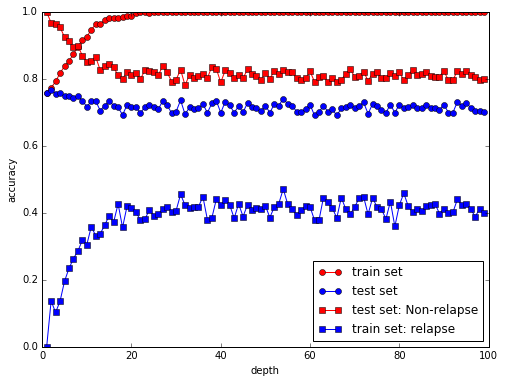

In [68]:
plt.figure(figsize=(8,6))
plt.plot(range(1,100),score_K[1:100,0],'ro-', label ='train set')          
plt.plot(range(1,100),score_K[1:100,1],'bo-', label ='test set') 
plt.plot(range(1,100),score_K[1:100,2],'rs-', label ='test set: Non-relapse') 
plt.plot(range(1,100),score_K[1:100,3],'bs-', label ='train set: relapse') 

plt.xlabel('depth')        
plt.ylabel('accuracy') 
plt.legend(loc = 'best')         

plt.show()

## balance dataset

In [81]:
x_train, x_test, y_train, y_test = train_test_split(data_dummy, y, train_size=0.7)

n=500
ind0 = np.random.choice(y_train[y_train==0].index, n, replace=True)
ind1 = np.random.choice(y_train[y_train==1].index, n, replace=True)
x_frames = [x_train.ix[ind0,], x_train.ix[ind1, ]]
x_train_sub = pd.concat(x_frames, axis = 0)
y_frames = [y_train[ind0], y_train[ind1]]
y_train_sub = pd.concat(y_frames, axis = 0)

In [82]:
pred_matrix = np.zeros((len(y_test),100))
importance_matrix = np.zeros((1284, 100))
for i in range(100):
    dt = DecisionTree(max_depth = 30)
    dt.fit(x_train_sub, y_train_sub)
    pred_matrix[:,i] = dt.predict(x_test)
    importance_matrix[:,i] = dt.feature_importances_

In [83]:
results = pred_matrix.mean(axis =1)
results[results > 0.5 ]=1
results[results < 0.5 ]=0
results[results ==0.5] = np.random.choice([0,1])
print('accuracy of non-relapse:')
print np.mean((results == y_test)[y_test ==0])
print('accuracy of relapse:')
print np.mean((results == y_test)[y_test ==1])

accuracy of non-relapse:
0.734439834025
accuracy of relapse:
0.55223880597


## get important features

In [84]:
importance = importance_matrix.mean(axis =1)
indices = np.argsort(importance)[::-1][0:20]

namelist = []
for ind in indices:
    name = find_feature(ind, index, features)
    namelist.append(name)
print namelist
print importance[indices]

['n2531', 'n1454', 'n450', 'n1175', 'n504', 'n1175', 'n442', 'n496', 'n455', 'n497', 'n504', 'n283', 'n139', 'n1008', 'n1001', 'n1004', 'n121', 'n1447', 'n977', 'n526']
[ 0.23954294  0.04898613  0.03048835  0.03021799  0.02682018  0.02347774
  0.02188833  0.02184882  0.02141849  0.02116068  0.01952153  0.01733439
  0.01641455  0.01608044  0.01339704  0.01327163  0.0118031   0.01179467
  0.01159309  0.01138344]


In [85]:
import plotly.plotly as py
import plotly.graph_objs as go

# non-relapse accuracy
trace0 = go.Bar(
    x=['LogReg', 'LDA', 'QDA', 'DT', 'RF', 'SVC linear','SVC quadratic'],
    y=[float(logreg_cm[0, 0]) / logreg_cm[0].sum(), float(lda_cm[0, 0]) / lda_cm[0].sum(),
      float(qda_cm[0, 0]) / qda_cm[0].sum(), float(dt_cm[0, 0]) / dt_cm[0].sum(),
      float(rf_cm[0, 0]) / rf_cm[0].sum(), float(svc_linear_cm[0, 0]) / svc_linear_cm[0].sum(),
      float(svc_quad_cm[0, 0]) / svc_quad_cm[0].sum()],
    name='Non-replase Accuracies',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
# replase accuracy
trace1 = go.Bar(
    x=['LogReg', 'LDA', 'QDA', 'DT', 'RF', 'SVC linear','SVC quadratic'],
    y=[float(logreg_cm[1, 1]) / logreg_cm[1].sum(), float(lda_cm[1, 1]) / lda_cm[1].sum(),
      float(qda_cm[1, 1]) / qda_cm[1].sum(), float(dt_cm[1, 1]) / dt_cm[1].sum(),
      float(rf_cm[1, 1]) / rf_cm[1].sum(), float(svc_linear_cm[1, 1]) / svc_linear_cm[1].sum(),
      float(svc_quad_cm[1, 1]) / svc_quad_cm[1].sum()],
    name='Replase Accuracies',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data1 = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='angled-text-bar')

Feature ranking:
1. feature 1218 (0.239543)
2. feature 898 (0.048986)
3. feature 797 (0.030488)
4. feature 938 (0.030218)
5. feature 180 (0.026820)
6. feature 930 (0.023478)
7. feature 761 (0.021888)
8. feature 132 (0.021849)
9. feature 823 (0.021418)
10. feature 134 (0.021161)
11. feature 185 (0.019522)
12. feature 585 (0.017334)
13. feature 486 (0.016415)
14. feature 980 (0.016080)
15. feature 983 (0.013397)
16. feature 1062 (0.013272)
17. feature 414 (0.011803)
18. feature 868 (0.011795)
19. feature 1100 (0.011593)
20. feature 99 (0.011383)


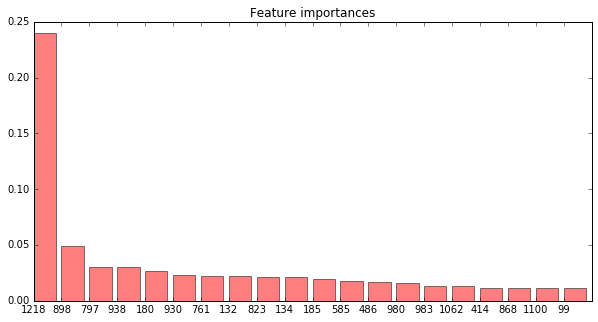

In [86]:
# Compute the feature importances for decision tree
# Print the feature ranking
print("Feature ranking:")

#for f in range(x_train.shape[1]):
for f in range(20):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (10,5))
plt.title("Feature importances")

#Bar plot of the frequencies of the top words
plt.bar(range(20), importance[indices], color='red', alpha=0.5)

#Label the bars with the top words
plt.xticks(range(20), indices)
plt.show()

In [109]:
import plotly
plotly.tools.set_credentials_file(username='xinruicao', api_key='GBPqjuPjh3Gwc6Q3L9Te')

In [122]:
import plotly.plotly as py
import plotly.graph_objs as go

y = ['Fearful of new situations','Is child irritable', 'Inconsequential behaviour',
    'Male head\'s socio-economic grp', 'Parity', 'male head\'s socio-economic grp',
    'Writing off adults&standrds', 'Mother\'s weight in stones', 'total score all syndromes',
    'Gestation period', 'parity', 'Close relative-congenital heart cond.', 'Continually worried',
    'Total score all syndromes', 'Total score inconsequential Behavior',  
    'Total score miscellaneous symptoms', 'Child normally active', 'Difficulty settling to anything',
    'Total score withdrawal syndrome', 'Mothers fathers social class']
y_short = ['Fearful of new','Irritable', 'Inconsequential behave',
    'Father socio-economic', 'Parity', 'father socio-economic',
    'Writing off adults', 'Mother weight', 'Score all syndromes',
    'Gestation period', 'parity', 'Relative heart cond.', 'Continually worried',
    'score all syndromes', 'Inconsequential Behave',  
    'Score miscellaneous', 'Child active', 'Difficulty settling',
    'Score withdrawal', 'Family social class']

trace0 = go.Bar(
    y= y_short,
    x= list(importance[indices]),
    text=list(namelist),
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.0,
        )
    ),
    orientation = 'h',
    hoverinfo ='x+y',
    opacity=0.6
)

data1 = [trace0]
layout = go.Layout(
    title='Feature importances',
    yaxis=dict(
        showgrid=True,
        gridcolor='#bdbdbd',
        gridwidth=2,     
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        )
    )
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='bar plot')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~xinruicao/0 or inside your plot.ly account where it is named 'bar plot'


In [90]:
# # Pie chart on varialbe 'n2030'
# haematological = list(data['n2030'])
# print len(haematological)
# print len(y)

# d = {'Haematological': haematological, 'y': y}
# demo_haematological = pd.DataFrame(data=d)
# demo_haematological.head()

1026
1026


,Haematological,y
7,1,0
25,1,0
34,2,0
56,-1,0
61,-1,0


In [91]:
# demo_haematological0 = demo_haematological.query('y == 0')
# demo_haematological1 = demo_haematological.query('y == 1')
# total_y0 = len(demo_haematological0)
# total_y1 = len(demo_haematological1)
# print total_y0, total_y1

776 250


In [92]:
# y0 = np.zeros(shape = (8,1))
# y1 = np.zeros(shape = (8,1))

# for i in range(1,8):
#     y0[i-1] = float(sum(demo_haematological0['Haematological']==i)/float(total_y0))
#     y1[i-1] = float(sum(demo_haematological1['Haematological']==i)/float(total_y1))
    
# y0[7] = float(sum(demo_haematological0['Haematological']==-1)/float(total_y0))
# y1[7] = float(sum(demo_haematological1['Haematological']==-1)/float(total_y1))

In [93]:
# # Pie chart variable 'n2030', Variable label = 3M Haematological abnormality
# fig = {
#     'data': [
#         {
#             'labels': ['No abnormality', 'Cond uncertain', 'Cond,no handcp', 'Slight handicap',
#                         'Moderate handicp', 'Severe handicap', 'Cond,DK degree', 'NA'],
#             'values': y0,
#             'type': 'pie',
#             'name': 'no relapse',
#              'domain': {'x': [0, .48],
#                        'y': [0, .49]},
#             'hoverinfo':'label+percent+name'
#         },
#         {
#             'labels': ['No abnormality', 'Cond uncertain', 'Cond,no handcp', 'Slight handicap',
#                         'Moderate handicp', 'Severe handicap', 'Cond,DK degree', 'NA'],
#             'values': y1,
#             'type': 'pie',
#             'name':'relapse',
#             'domain': {'x': [.52, 1],
#                        'y': [0, .49]},
#             'hoverinfo':'label+percent+name'
#         }],
#     'layout': {'title': 'Category proportions of Haematological abnormality by relapse status'}
#      }

# py.iplot(fig)

In [143]:
# Pie chart on varialbe 'n2030'
fearful = list(data['n2531'])
print len(fearful)
y = np.zeros(len(UKDA16))
y = pd.DataFrame(y, index = UKDA16.index)
y[s1s2&s3] = 1
y = y[s1s2]
y = y.astype(int)
y = y[0]
print len(y)

d = {'fearful': fearful, 'y': y}
demo_fearful = pd.DataFrame(data=d)
demo_fearful.head()

1026
1026


,fearful,y
7,1,0
25,2,0
34,1,0
56,-1,0
61,-1,0


In [144]:
demo_fearful0 = demo_fearful.query('y == 0')
demo_fearful1 = demo_fearful.query('y == 1')
total_y0 = len(demo_fearful0)
total_y1 = len(demo_fearful1)
print total_y0, total_y1


776 250


In [145]:
y0 = np.zeros(shape = (4,1))
y1 = np.zeros(shape = (4,1))

for i in range(1,4):
    y0[i-1] = float(sum(demo_fearful0['fearful']==i)/float(total_y0))
    y1[i-1] = float(sum(demo_fearful1['fearful']==i)/float(total_y1))
    
y0[3] = float(sum(demo_fearful0['fearful']==-1)/float(total_y0))
y1[3] = float(sum(demo_fearful1['fearful']==-1)/float(total_y1))

In [147]:
# Pie chart variable 'n2513', Variable label = 3P Fearful of new situations or things
fig = {
    'data': [
        {
            'labels': ['Does not apply', 'Applies somewhat', 'Certainly applies', 'NA'],
            'values': y0,
            'type': 'pie',
            'name': 'no relapse',
             'domain': {'x': [0, .48],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name'
        },
        {
            'labels': ['Does not apply', 'Applies somewhat', 'Certainly applies', 'NA'],
            'values': y1,
            'type': 'pie',
            'name':'relapse',
            'domain': {'x': [.52, 1],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name'
        }],
    'layout': {'title': 'Category proportions of "Fearful of new situations abnormality" by relapse status'}
     }

py.iplot(fig)

In [151]:
# donut
fig = {
  "data": [
    {
      "values": y0,
      "labels": ['Does not apply', 'Applies somewhat', 'Certainly applies', 'NA'],
      "domain": {"x": [0, .48]},
      "name": "No relapse",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": y1,
      'labels': ['Does not apply', 'Applies somewhat', 'Certainly applies', 'NA'],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Relapse",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title": 'Category proportions of "Fearful of new situations abnormality" by relapse status',
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "No Relapse",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Relapse",
                "x": 0.82,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)


In [136]:
# Pie chart variable 'n1454', Variable label = Is child irritable, quick tempered
irritable = list(data['n1454'])
print len(irritable)

d = {'irritable': irritable, 'y': y}
demo_irritable = pd.DataFrame(data=d)
demo_irritable.head()

1026


,irritable,y
7,3,0
25,1,0
34,1,0
56,-1,0
61,1,0


In [137]:
demo_irritable0 = demo_irritable.query('y == 0')
demo_irritable1 = demo_irritable.query('y == 1')
total_y0 = len(demo_irritable0)
total_y1 = len(demo_irritable1)
print total_y0, total_y1

776 250


In [138]:
y0 = np.zeros(shape = (6,1))
y1 = np.zeros(shape = (6,1))

for i in range(1,5):
    y0[i-1] = float(sum(demo_irritable0['irritable']==i)/float(total_y0))
    y1[i-1] = float(sum(demo_irritable1['irritable']==i)/float(total_y1))
    
y0[4] = float(sum(demo_irritable0['irritable']==9)/float(total_y0))
y1[4] = float(sum(demo_irritable1['irritable']==9)/float(total_y1))

y0[5] = float(sum(demo_irritable0['irritable']==-1)/float(total_y0))
y1[5] = float(sum(demo_irritable1['irritable']==-1)/float(total_y1))

In [139]:
fig = {
    'data': [
        {
            'labels': ['No, never', 'Yes, sometimes', 'Yes, frequently', 'Do not know', 
                       'Inapplicable', 'Not applicable'],
            'values': y0,
            'type': 'pie',
            'name': 'no relapse',
             'domain': {'x': [0, .48],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name'
        },
        {
            'labels': ['No, never', 'Yes, sometimes', 'Yes, frequently', 'Do not know', 
                       'Inapplicable', 'Not applicable'],
            'values': y1,
            'type': 'pie',
            'name':'relapse',
            'domain': {'x': [.52, 1],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name'
        }],
    'layout': {'title': 'Category proportions of "Fearful of new situations abnormality" by relapse status'}
     }

py.iplot(fig)